1.開 Google Colab + 開 GPU

Colab：執行階段 → 變更執行階段類型 → 硬體加速器選 GPU

2.掛載google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3.安裝 YOLOv8（Ultralytics）

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.2 MB/s eta 0:00:00


4-1.預先建立資料夾，以免解壓後找不到路徑

In [4]:
!mkdir -p /content/datasets
!unzip -q "/content/drive/MyDrive/AI_114/Emotions.zip" -d /content/datasets
!ls -lah /content/datasets | head

total 32K
drwxr-xr-x 5 root root 4.0K Dec 27 20:30 .
drwxr-xr-x 1 root root 4.0K Dec 27 20:30 ..
-rw-r--r-- 1 root root  355 Sep  3  2024 data.yaml
-rw-r--r-- 1 root root  262 Sep  3  2024 README.dataset.txt
-rw-r--r-- 1 root root 1.1K Sep  3  2024 README.roboflow.txt
drwxr-xr-x 4 root root 4.0K Sep  3  2024 test
drwxr-xr-x 4 root root 4.0K Sep  3  2024 train
drwxr-xr-x 4 root root 4.0K Sep  3  2024 valid


4-2.確認解壓後結構

In [5]:
!ls /content/

datasets  drive  sample_data


4-3.檢查路徑與類別

In [7]:
!cat /content/datasets/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 8
names: ['anger', 'content', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

roboflow:
  workspace: emotions-dectection
  project: human-face-emotions
  version: 30
  license: CC BY 4.0
  url: https://universe.roboflow.com/emotions-dectection/human-face-emotions/dataset/30

5-1.開始訓練

In [5]:
!yolo task=detect \
  mode=train \
  model=yolov8n.pt \
  data=/content/datasets/data.yaml \
  epochs=10 \
  imgsz=640 \
  batch=8 \
  project=/content/drive/MyDrive/yolo_project \
  name=exp1


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp14, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

5-2.確認訓練輸出資料夾

In [7]:
!ls -lah "/content/drive/MyDrive/yolo_project"


total 16K
drwx------ 3 root root 4.0K Dec 27 20:49 exp1
drwx------ 3 root root 4.0K Dec 27 21:08 exp12
drwx------ 3 root root 4.0K Dec 27 21:11 exp13
drwx------ 3 root root 4.0K Dec 27 21:37 exp14


In [8]:
EXP_DIR = "/content/drive/MyDrive/yolo_project/exp14"  # <<< 如果不是 exp1，改成你實際那個資料夾

5-3.檢查 weights 是否存在

In [14]:
!ls -lah "/content/drive/MyDrive/yolo_project/exp14/weights"


total 12M
-rw------- 1 root root 6.0M Dec 27 21:37 best.pt
-rw------- 1 root root 6.0M Dec 27 21:37 last.pt


6-1.觀看訓練結果圖

In [15]:
!ls -lah "/content/drive/MyDrive/yolo_project/exp14" | grep -E "\.png|\.jpg" || true


-rw------- 1 root root 317K Dec 27 21:37 BoxF1_curve.png
-rw------- 1 root root 305K Dec 27 21:37 BoxP_curve.png
-rw------- 1 root root 248K Dec 27 21:37 BoxPR_curve.png
-rw------- 1 root root 299K Dec 27 21:37 BoxR_curve.png
-rw------- 1 root root 271K Dec 27 21:37 confusion_matrix_normalized.png
-rw------- 1 root root 214K Dec 27 21:37 confusion_matrix.png
-rw------- 1 root root 159K Dec 27 21:14 labels.jpg
-rw------- 1 root root 265K Dec 27 21:37 results.png
-rw------- 1 root root 294K Dec 27 21:14 train_batch0.jpg
-rw------- 1 root root 337K Dec 27 21:14 train_batch1.jpg
-rw------- 1 root root 316K Dec 27 21:14 train_batch2.jpg
-rw------- 1 root root 539K Dec 27 21:37 val_batch0_labels.jpg
-rw------- 1 root root 546K Dec 27 21:37 val_batch0_pred.jpg
-rw------- 1 root root 523K Dec 27 21:37 val_batch1_labels.jpg
-rw------- 1 root root 530K Dec 27 21:37 val_batch1_pred.jpg
-rw------- 1 root root 562K Dec 27 21:37 val_batch2_labels.jpg
-rw------- 1 root root 570K Dec 27 21:37 val_batc

6-2.顯示圖片

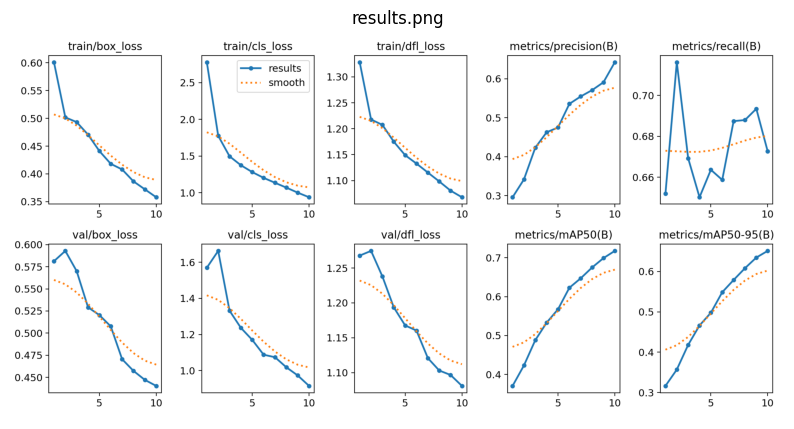

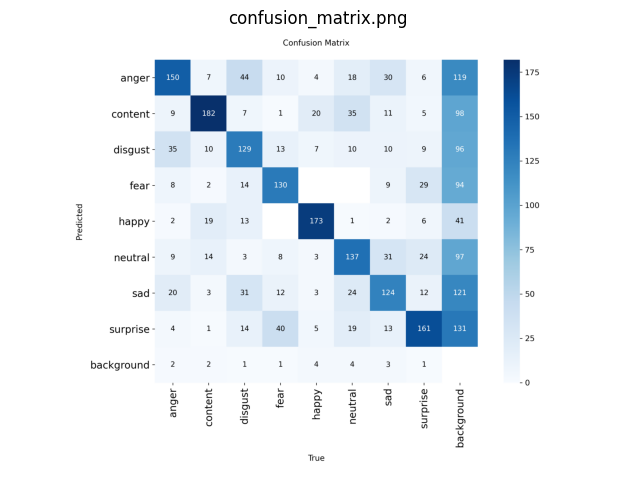

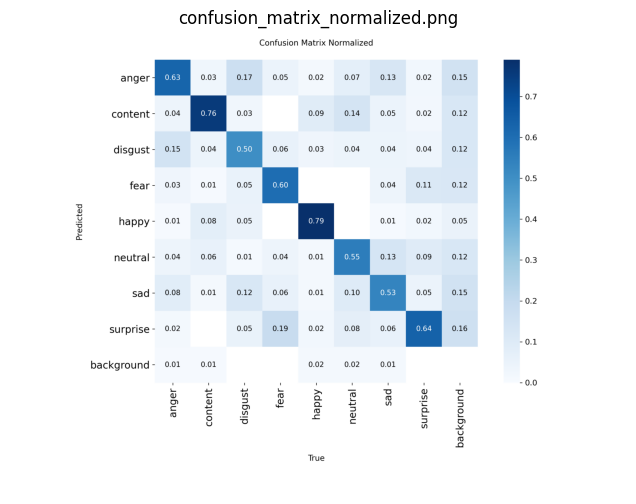

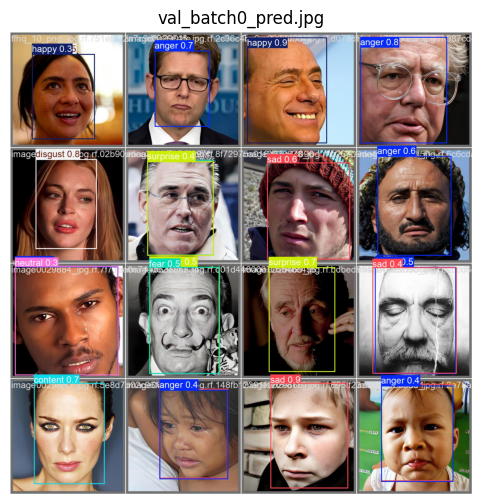

In [16]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

exp = Path(EXP_DIR)
files = [
    exp/"results.png",
    exp/"confusion_matrix.png",
    exp/"confusion_matrix_normalized.png",
    exp/"val_batch0_pred.jpg"
]

for f in files:
    if f.exists():
        img = Image.open(f)
        plt.figure(figsize=(10,6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f.name)
        plt.show()


7-1.用 best.pt 做推論（predict），先用 valid/images

In [17]:
from ultralytics import YOLO

best = f"{EXP_DIR}/weights/best.pt"
model = YOLO(best)

SOURCE = "/content/datasets/valid/images"
model.predict(source=SOURCE, imgsz=640, conf=0.5, max_det=100, save=True)



WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1873 /content/datasets/valid/images/ffhq_10_png_jpg.rf.751e8f22a7c9dbe9901fe02069850b43.jpg: 640x640 1 disgust, 9.0ms
image 2/1873 /content/datasets/valid/images/ffhq_1100_png_jpg.rf.7131ba7cc475d896697afe61502a33e4.jpg: 640x640 1 neutral, 7.3ms
image 3/1873 /content/datasets/valid/images/ffhq_1101_png_jpg.rf.4a0b7f60223d12972f9eea78422614bd.jpg: 640x640 1 content, 7.3ms
image 4/1873 /content/datasets/valid/images/ffhq_1108_png_jpg.rf.6f817c05509

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'anger', 1: 'content', 2: 'disgust', 3: 'fear', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprise'}
 obb: None
 orig_img: array([[[ 99, 154, 191],
         [ 99, 154, 191],
         [ 99, 154, 191],
         ...,
         [249, 242, 222],
         [248, 241, 221],
         [248, 241, 221]],
 
        [[ 99, 154, 191],
         [ 99, 154, 191],
         [ 99, 154, 191],
         ...,
         [249, 242, 222],
         [248, 241, 221],
         [248, 241, 221]],
 
        [[ 99, 154, 191],
         [ 99, 154, 191],
         [ 99, 154, 191],
         ...,
         [248, 241, 221],
         [248, 241, 221],
         [248, 241, 221]],
 
        ...,
 
        [[135, 155, 190],
         [134, 154, 189],
         [133, 153, 188],
         ...,
         [  1,  11, 128],
         [  0,  10, 127],
         [  0,  10, 127]],
 
        [[134, 154, 1

7-2.找推論輸出資料夾

In [18]:
!ls -lt /content/runs/detect | head -n 20


total 188
drwxr-xr-x 2 root root 192512 Dec 27 21:55 predict


In [19]:
!ls -lah /content/runs/detect/predict | head

total 147M
drwxr-xr-x 2 root root 188K Dec 27 21:55 .
drwxr-xr-x 3 root root 4.0K Dec 27 21:54 ..
-rw-r--r-- 1 root root  65K Dec 27 21:54 ffhq_10_png_jpg.rf.751e8f22a7c9dbe9901fe02069850b43.jpg
-rw-r--r-- 1 root root  63K Dec 27 21:54 ffhq_1100_png_jpg.rf.7131ba7cc475d896697afe61502a33e4.jpg
-rw-r--r-- 1 root root  89K Dec 27 21:54 ffhq_1101_png_jpg.rf.4a0b7f60223d12972f9eea78422614bd.jpg
-rw-r--r-- 1 root root 102K Dec 27 21:54 ffhq_1108_png_jpg.rf.6f817c055093ff9e24c466dde35013b4.jpg
-rw-r--r-- 1 root root 103K Dec 27 21:54 ffhq_1110_png_jpg.rf.f09f83fa66cd11f6fe658b4decf128d1.jpg
-rw-r--r-- 1 root root  81K Dec 27 21:54 ffhq_1125_png_jpg.rf.91efded72968e1a756980537593f0e3b.jpg
-rw-r--r-- 1 root root  72K Dec 27 21:54 ffhq_1143_png_jpg.rf.c40fe3c94126fdec972a07e9a97769bd.jpg


8.把推論結果存回 Drive

In [20]:
import shutil
from datetime import datetime

src = "/content/runs/detect/predict"  # <<< 改成你最新的 predict 資料夾
dst = f"/content/drive/MyDrive/yolo_project/predict_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
shutil.copytree(src, dst, dirs_exist_ok=True)
print("Saved to:", dst)

Saved to: /content/drive/MyDrive/yolo_project/predict_20251227_220709


9.(可選)匯出模型（ONNX）

In [21]:
!yolo export model="/content/drive/MyDrive/yolo_project/exp1/weights/best.pt" format=onnx


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 955, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/models/yolo/model.py", line 76, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/model.py", line 144, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/model.py", line 283, in _load
    self.model, self.ckpt = load_checkpoint(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py", line 1461, in load_checkpoint
    ckpt, weight = torch_safe_load(weight)  # load ckpt
                   ^^^^^^^^^